# Курс "Рекомендательные системы"

## Практическое задание урока 1.  Введение, примеры задач, бизнес- и ML-метрики

### Задание 1

Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?

**Решение**

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)


*Precision* - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров  юзер купил

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)  
Precision@k = (#@k (первые k) рекомендованных товаров, которые являются релевантными) / (#@k рекомендованных товаров)

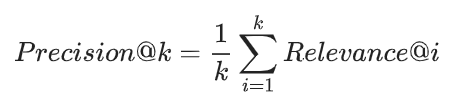

Метрику hit_rate@k предпочтительные использовать в случае рекомендации уникальных товаров. Это случаи, когда пользователь купил один из рекомендованных товаров, и другие уже не купит.  Например:

1) ***Автомобили для пользования***

Клиент - обычный человек, товар - обычный автомтобиль. Пользователь ищет автомобиль для личного пользования и в рекомедации было пять легковых автомобилей. Пользователь купил один из рекомендованных автомобилей. В этом случае предпочтительнее метрика Hit rate@k. 

Клиент - коммерческая организация, товар - автомобиль, подходящий для коммерческой эксплуатации.
Клиент - коллекционер, товар - коллекционный автомобиль. 
С автомобилями могут быть иные ситуации. Если пользователю нужны автомобили для коммерческого использования или он является коллекционером (то есть потенциально может совершать покупки нескольких автомобилей сразу), то лучше подойдет метрика Precision@k.


2) ***Новогодние елки***

Клиент - обычный человек (нынешний или бывший гражданин России, СССР), товар - новогодняя ёлка.
Метрика Hit_rate@k предпочтительнее, так как наиболее вероятно, что пользователь накануне российского календарного Нового года  купит одну ёлку. 

Клиент - бизнес HoReCa, товар - новогодняя ёлка.
Могут быть случаи, когда приобретают несколько ёлок сразу и разных по размеру, оформлению (например, для компании гостинично-ресторанного бизнеса или для большого частного дома). Метрика Precision@k будет более релевантной.

Возможно для ёлок одних категорий имеет смысл использовать Hit_rate@k, а для ёлок других категорий - Precision@k


### Задание 2

В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.

**Решение**


***NDCG@k (Normalized discounted cumulative gain)*** - Информативность выдачи с учетом ранжирования рекомендаций


$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$

Рост логарифмической функции (с основанием больше 1) замедляется при увеличении значений. Поэтому её удобно использовать для ранжирования - позиции в начале списка отличаются гораздо сильнее, чем позиции в его конце. Следовательно, взамен логарифма можно использовать функцию с аналогичными свойствами, например, следующую:

$y = \sqrt[2k]{x}$

Примером метрик/подходов к предобработке данных/функций ошибок в ML, где также используется логарифм, может быть:


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}_{2}(1 + \text{exp}(- M_{i}))$



### Задание 3

Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).

**Решение**

***Среднеобратный ранг (MRR@k, Mean Reciprocal Rank)*** - одна из метрик качества ранжирования

- Считаем для первых k рекомендаций
- Найти ранг первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$ для u-го объекта. Величина, равная обратному рангу первого правильно угаданного элемента.

Среднеобратный ранг определяется как среднее обратных рангов по всем запросам U:

$$MRR = mean(\frac{1}{k_u})$$

Mean reciprocal rank изменяется в диапазоне [0,1] и учитывает позицию элементов. Он делает это только для одного элемента — 1-го верно предсказанного, не обращая внимания на все последующие.

Результатом интеракции (взаимодействия пользователя и товара) может быть покупка товара, оценка товара пользователем.

***PFound***

Разработка Яндекс, которая используется для оценки качества ранжирования. Расчет PFound производится по такой формуле:

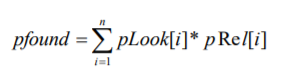

Где pLook[i] — вероятность просмотреть i-й документ из списка, а pRel[i] — вероятность того, что i-й документ окажется релевантным.

Резульатом интеракции является просмотр документа пользователем.

### Задание 4

boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, MRR@8,  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)

IDCG должен считаться для всех 8 позиций рекомендаций

**Решение**

In [28]:
import numpy as np

In [29]:
boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

***pr@8***

boughted = [1, 3, 5, 7, 9, 11]

recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

$precison@8 = \frac{0 + 0 + 1 + 1 + 1 + 1}{8} = 50\%$ 

In [30]:
def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    precision = flags.sum() / len(recommended_list)
    
    
    return precision

In [31]:
precision_at_k(recommended, boughted, k=8)

0.5

***rec@8***

boughted = [1, 3, 5, 7, 9, 11]

recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

$rec@8 = \frac{0 + 0 + 1 + 1 + 1 + 1}{6} = 66.7\%$ 

In [32]:
def recall_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall

In [33]:
recall_at_k(recommended, boughted, k=8)

0.6666666666666666

***AP@8***


boughted = [1, 3, 5, 7, 9, 11]

recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

$precison@2 = \frac{0 + 1}{2} = 50.0\%$ 

$precison@3 = \frac{0 + 1 + 1}{3} = 66.7\%$ 

$precison@5 = \frac{0 + 0 + 1 + 1 + 1}{5} = 60.0\%$ 

$precison@6 = \frac{0 + 0 + 1 + 1 + 1 + 1}{6} = 66.7\%$ 

$AP@8 = \frac{1/2 + 2/3 + 3/5 + 4/6}{8} = 30.4\%$ 

In [34]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(1, k+1): 
        if flags[i-1] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i)
            sum_ += p_k
            
    result = sum_ / len(flags)
    
    return result

In [35]:
ap_k(recommended, boughted, k=8)

0.30416666666666664

In [36]:
bought_list = np.array(boughted)
recommended_list = np.array(recommended)

flags = np.isin(recommended_list, bought_list)
flags

array([False,  True,  True, False,  True,  True, False, False, False,
        True])

***NDCG@8***

recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

boughted = [1, 3, 5, 7, 9, 11]

$DCG@8 = \frac{1}{8}*(0 / 1 + 1 / log(2) + 1 / log(3) + 0 / log(4) + 1 / log(5) + 1 / log(6) + 0 / log(7) + 0 / log(8))= 30.61\%$  
$ideal DCG@8 = \frac{1}{8}*(1 / 1 + 1 / log(2) + 1 / log(3) + 1 / log(4) + 1 / log(5) + 1 / log(6) + 1 / log(7) + 1 / log(8))= 57.97\%$  

$NDCG = \frac{DCG}{ideal DCG}\ = \frac{0.3061}{0.5797} = 52.9\%$

In [37]:
import math

In [38]:
ideal_DCG=(1/1+1/math.log(2, 2)+1/math.log(3, 2)+1/math.log(4, 2)+1/math.log(5, 2)+1/math.log(6, 2)+1/math.log(7, 2)+1/math.log(8, 2))/8
ideal_DCG

0.5797499549150934

In [39]:
DCG=(0/1+1/math.log(2, 2)+1/math.log(3, 2)+0/math.log(4, 2)+1/math.log(5, 2)+1/math.log(6, 2)+0/math.log(7, 2)+0/math.log(8, 2))/8
DCG

0.306057389859924

In [40]:
nDCG = DCG / ideal_DCG
nDCG 

0.527912744563727

In [41]:
def ndcg_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    
    if flags[0] == True:
        sum_ = 1
    
    for i in range(1, k):
        if flags[i-1] == True:            
            dcg_k = 1 / math.log(i, 2)
            sum_ += dcg_k
            
            
    result = sum_ / len(recommended_list)
    
    ideal_sum_ = 0
    for i in range(1, k+1):
        ideal_dcg = 1 / math.log(max(2,i), 2)
        ideal_sum_ += ideal_dcg    
      
    ideal = ideal_sum_ / len(recommended_list)
        
    ndcg = result / ideal
   
    return ndcg, result, ideal

In [42]:
ndcg_at_k(recommended, boughted, k=8)

(0.527912744563727, 0.306057389859924, 0.5797499549150934)

***MRR@8***

recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

boughted = [1, 3, 5, 7, 9, 11]

$MRR@8 = \frac{1/2 + 1/3 + 1/5 + 1/6}{8} = 15\%$ 

In [43]:
def reciprocal_rank(recommended_list, bought_list, k=5):
    recommended_list = recommended_list[:k]
    
    ranks=0.
    for i, item_rec in enumerate(recommended_list):
        for item_bought in bought_list:
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list)

In [44]:
reciprocal_rank(recommended, boughted, k=8)

0.15